In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np
# Import necessary libraries for data analysis and visualization
import pandas as pd
# Import necessary libraries for data analysis and visualization
import seaborn as sns
# Import necessary libraries for data analysis and visualization
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
# Load dataset into a pandas DataFrame
df = pd.read_csv(r"D:\Coding\Artificial Intelligence\csv file\income_evaluation.csv")
# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Check Dataset Shape

In [3]:
# Print the number of rows and columns in the dataset
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


### Rename Columns for Better Readability

In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df.columns = col_names
# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset Information

In [5]:
# Get an overview of the dataset including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Summary Statistics

In [6]:
# Generate statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Identify Categorical Variables

In [7]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print(f'There are {len(categorical)} categorical variables.')
print('Categorical Variables:', categorical)

There are 9 categorical variables.
Categorical Variables: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


### Check for Missing Values

In [8]:
# Check for missing values in the dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Frequency Distribution of Categorical Variables

In [9]:
for var in categorical:
    print(f"Value Counts for {var}:")
# Count occurrences of each unique value in a categorical column
    print(df[var].value_counts(), "\n")

Value Counts for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

Value Counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64 

Value Counts for marital_status:
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtyp

### Visualize Income Distribution

C:\Users\Shreyansh Mishra\AppData\Local\Temp\ipykernel_14184\4148865677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="income", data=df, palette="Set1", ax=ax[1])


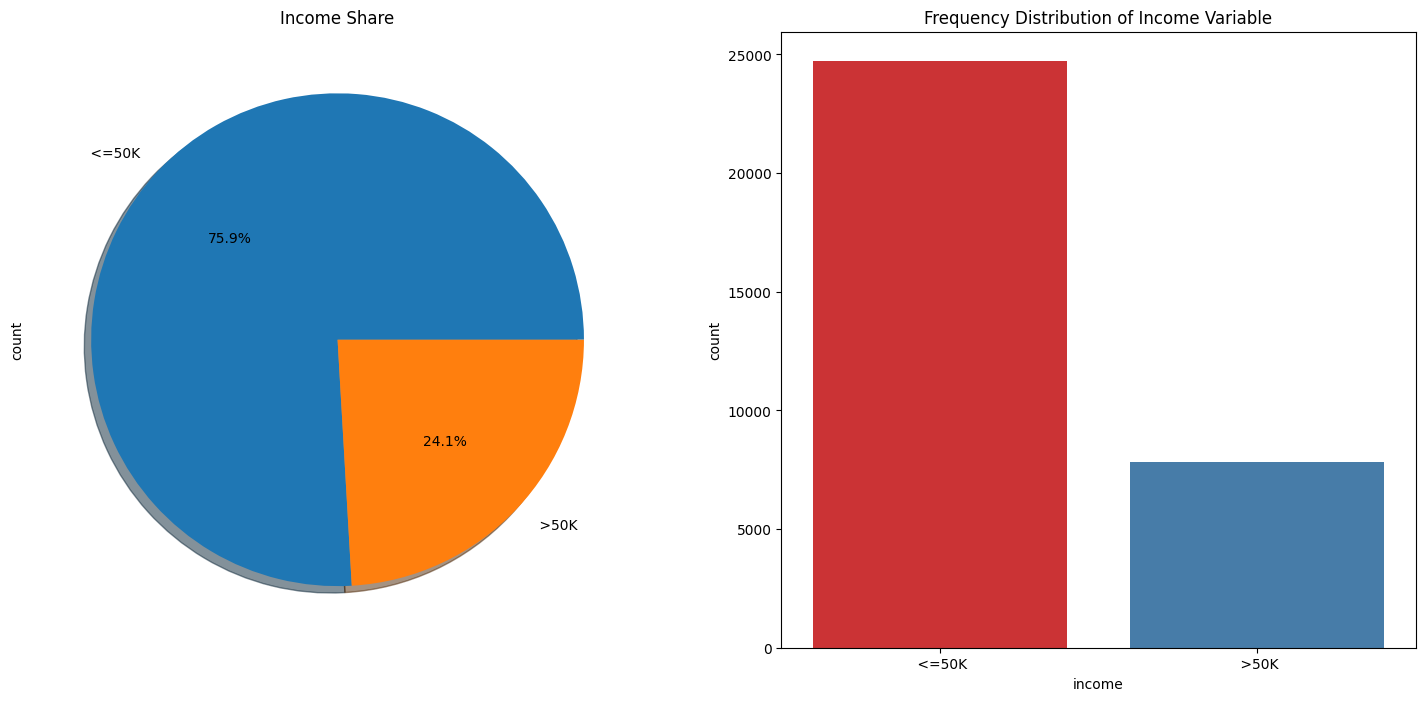

In [10]:
# Visualizing data using seaborn or matplotlib
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# Count occurrences of each unique value in a categorical column
df['income'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Income Share')
# Visualizing data using seaborn or matplotlib
sns.countplot(x="income", data=df, palette="Set1", ax=ax[1])
ax[1].set_title("Frequency Distribution of Income Variable")
# Visualizing data using seaborn or matplotlib
plt.show()

### Encode Categorical Variables

In [11]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)
# Display the first few rows of the dataset
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Convert Data Types (Ensure Compatibility)

In [12]:
df = df.astype(int)
print(df.dtypes)

age                                int32
fnlwgt                             int32
education_num                      int32
capital_gain                       int32
capital_loss                       int32
                                   ...  
native_country_ Trinadad&Tobago    int32
native_country_ United-States      int32
native_country_ Vietnam            int32
native_country_ Yugoslavia         int32
income_ >50K                       int32
Length: 101, dtype: object


### Final Check for Missing Values

In [13]:
# Check for missing values in the dataset
print(df.isnull().sum().sum())  # Should return 0

0


### Check Class Balance of Income Variable

In [14]:
print(df['income_ >50K'].value_counts(normalize=True))

income_ >50K
0    0.75919
1    0.24081
Name: proportion, dtype: float64


In [15]:
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation values
print(correlation_matrix)


                                      age    fnlwgt  education_num  \
age                              1.000000 -0.076646       0.036527   
fnlwgt                          -0.076646  1.000000      -0.043195   
education_num                    0.036527 -0.043195       1.000000   
capital_gain                     0.077674  0.000432       0.122630   
capital_loss                     0.057775 -0.010252       0.079923   
...                                   ...       ...            ...   
native_country_ Trinadad&Tobago  0.004843  0.005273      -0.017071   
native_country_ United-States    0.015917 -0.075287       0.101207   
native_country_ Vietnam         -0.015054 -0.011398      -0.007483   
native_country_ Yugoslavia       0.000375  0.005501      -0.001234   
income_ >50K                     0.234037 -0.009463       0.335154   

                                 capital_gain  capital_loss  hours_per_week  \
age                                  0.077674  5.777454e-02        0.068756   
f

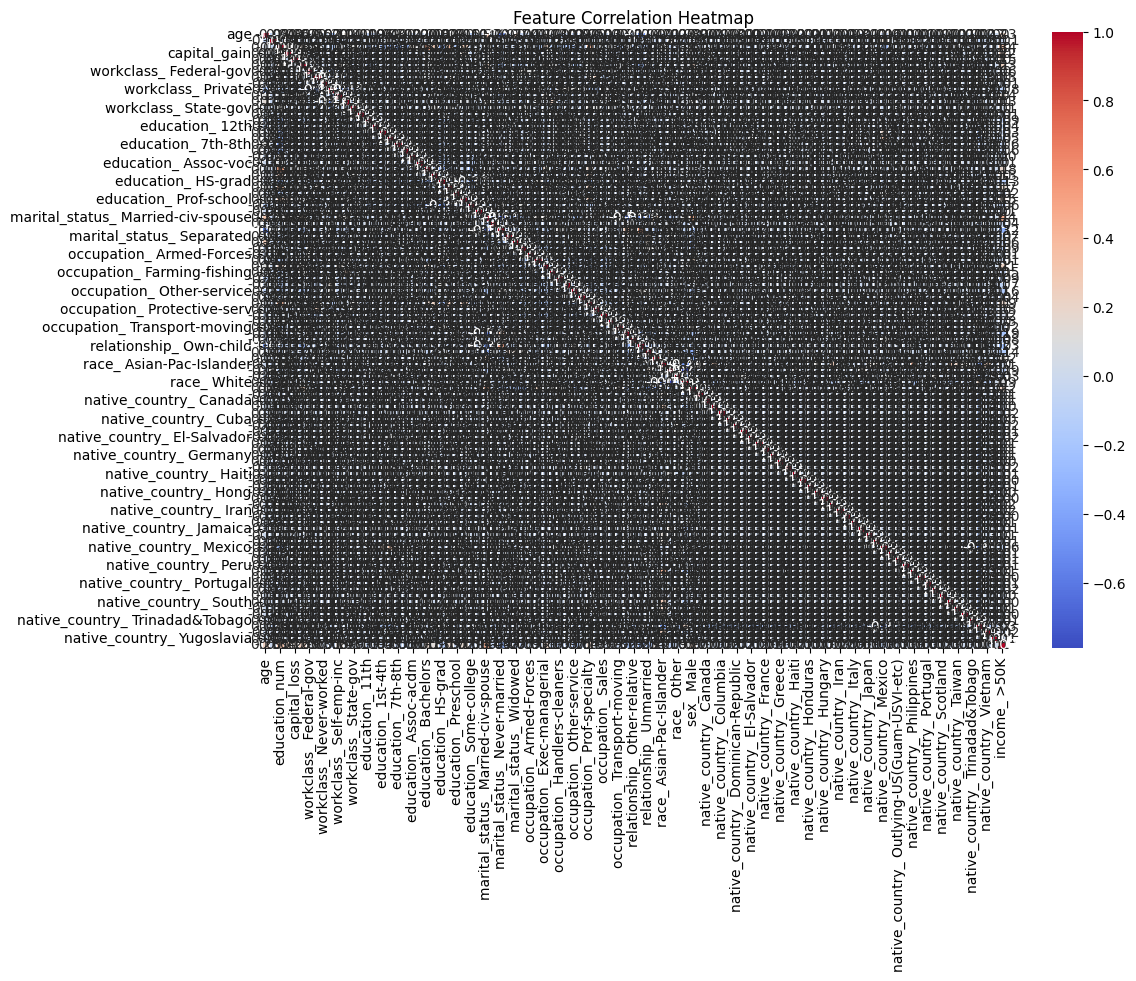

In [17]:
# Import necessary libraries for data analysis and visualization
import seaborn as sns
# Import necessary libraries for data analysis and visualization
import matplotlib.pyplot as plt

# Set the figure size
# Visualizing data using seaborn or matplotlib
plt.figure(figsize=(12, 8))

# Create heatmap
# Visualizing data using seaborn or matplotlib
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
# Visualizing data using seaborn or matplotlib
plt.title("Feature Correlation Heatmap")
# Visualizing data using seaborn or matplotlib
plt.show()


In [18]:
# List of columns to keep
columns_to_keep = [
    'age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week',
    'workclass_ Private', 'income_ >50K'  # Keeping target variable
]

# Selecting only the necessary columns
df = df[columns_to_keep]

# Check new shape
# Print the number of rows and columns in the dataset
print(df.shape)  # Should show fewer columns
print(df.columns)  # Verify the remaining columns


(32561, 7)
Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Private', 'income_ >50K'],
      dtype='object')


In [19]:
# Display the first few rows of the dataset
df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Private,income_ >50K
0,39,13,2174,0,40,0,0
1,50,13,0,0,13,0,0
2,38,9,0,0,40,1,0
3,53,7,0,0,40,1,0
4,28,13,0,0,40,1,0


In [20]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop(columns=["income_ >50K"])
y = df["income_ >50K"]

# Splitting into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the number of rows and columns in the dataset
print(f"Training Data Shape: {X_train.shape}")
# Print the number of rows and columns in the dataset
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (26048, 6)
Testing Data Shape: (6513, 6)


In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8179
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4945
           1       0.71      0.41      0.52      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.68      0.70      6513
weighted avg       0.81      0.82      0.80      6513



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest training complete!")


Random Forest training complete!


In [24]:
# Predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8219
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4945
           1       0.68      0.49      0.57      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.71      0.73      6513
weighted avg       0.81      0.82      0.81      6513



In [25]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_depth": [10, 20, 30, None],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4]
# }

# rf_tuned = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_distributions=param_grid,
#     n_iter=20,
#     cv=5,
#     scoring="f1_macro",
#     n_jobs=-1
# )

# rf_tuned.fit(X_train, y_train)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model with modified hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=300,       # Number of trees in the forest
    min_samples_leaf=2,     # Minimum samples required at leaf node
    min_samples_split=5,    # Minimum samples required to split a node
    random_state=42         # Ensures reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest training complete!")


Random Forest training complete!


In [27]:
# Predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4945
           1       0.74      0.48      0.58      1568

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 1.5},  # Give class 1 slightly more weight, but not too much
    random_state=42
)


# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8366344234607708
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4945
           1       0.70      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [29]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define base models
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 1.5},  # Adjusting class weights
    random_state=42
)

lr_model = LogisticRegression(max_iter=1000)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('lr', lr_model)],  # Base models
    final_estimator=LogisticRegression()  # Meta-model
)

# Train Stacking Model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluate Performance
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Stacked Model Accuracy: 0.8400122831260556
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4945
           1       0.75      0.51      0.60      1568

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513



In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define base models
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 1.5},  # Adjusting class weights
    random_state=42
)

lr_model = LogisticRegression(max_iter=1000)

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Stacking Classifier with XGBoost
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model),
        ('xgb', xgb_model)  # Adding XGBoost as a base model
    ],
    final_estimator=LogisticRegression()  # Meta-model
)

# Train Stacking Model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluate Performance
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Stacked Model Accuracy: 0.8489175495163519
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4945
           1       0.78      0.52      0.62      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.74      0.76      6513
weighted avg       0.84      0.85      0.84      6513



In [31]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define Base Models
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 2},  # Adjusting class weights for better recall
    random_state=42
)

xgb_model = XGBClassifier(
    scale_pos_weight=3,  # Helps handle class imbalance
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Stacking Classifier with Logistic Regression as Meta-Model
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

# Train Stacking Model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluate Performance
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Stacked Model Accuracy: 0.8496852448948258
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.77      0.54      0.63      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.74      0.77      6513
weighted avg       0.84      0.85      0.84      6513

